<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150>

**Numerical Computations**

**Computer Engineering Department**

**Fall 2024**

**Practical Assignment 1 - Approximation and Interpolation**

**Mehran Bakhtiari**


____

*This* assignment explores sophisticated numerical approximation techniques, focusing on Taylor series expansions, optimized interpolation methods, and rigorous error analysis. You will implement and analyze various approximation techniques while optimizing for both accuracy and computational efficiency.

**Complete implementation of all code sections and provide detailed responses to conceptual questions. Make sure to run all the cells.**

### Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Tuple, List, Union
from time import perf_counter
from dataclasses import dataclass
import matplotlib.pyplot as plt
from typing import Callable, List

## Section 1: Taylor Series Expansion of Complex Functions (20 Points)
### Background
Taylor series provides a way to approximate complex functions using polynomials by expanding the function into an infinite series. This approach is particularly useful in numerical computation, as polynomial approximations are computationally efficient. Here, you will approximate the function $f(x)=e^{-x}\sin(5x)$, using Taylor series around the series expansion around $x$ = 0, examining convergence behavior for this oscillatory function. the series expansion around $x_0$ is:

$f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$

The challenge lies in:
1. Computing high-order derivatives efficiently
2. Determining optimal series truncation
3. Analyzing convergence behavior for oscillatory functions

### Task 1.1: Taylor Series Implementation (10 points)
**Step 1:** Start by writing a function that computes individual terms of the Taylor series expansion for $f(x)$.

**Step 2:** Sum the series up to a user-defined degree $n$, iteratively adding each term.

**Step 3:** Implement a convergence check by adding terms until the absolute change between consecutive terms is below a specified threshold (e.g., $10^{-6}$). This dynamic approach prevents unnecessary calculations when the series has converged.

In [131]:

@dataclass
class TaylorExpansion:
    """
    Compute and analyze Taylor series expansions for complex functions.
    """
    def __init__(self, f: Callable[[float], float],
                 df: List[Callable[[float], float]]):
        """
        Initialize with function and its derivatives.

        Args:
            f: Original function
            df: List of derivative functions [f', f'', ..., f^(n)]
        """
        self.f = f
        self.derivatives = df

    def compute_term(self, x: float, x0: float, n: int) -> float:
        """
        Compute nth term of Taylor series.

        Args:
            x: Evaluation point
            x0: Expansion point
            n: Term index

        Returns:
            Value of nth term
        """
        import math
        derivate_val = self.derivatives[n](x0)
        factorial = math.factorial(n)
        return (derivate_val / factorial) * (x - x0) ** n

    def expand(self, x: np.ndarray, x0: float,
               max_terms: int = 50,
               tol: float = 1e-6) -> Tuple[np.ndarray, int]:
        """
        Compute Taylor series with dynamic convergence check.

        Args:
            x: Points at which to evaluate series
            x0: Expansion point
            max_terms: Maximum number of terms to include
            tol: Convergence tolerance

        Returns:
            (approximation, number of terms used)
        """
        approximate = np.zeros_like(x, dtype=float)
        num_terms_used = 0
        for i in range(max_terms):
            term = np.array([self.compute_term(xi, x0, i) for xi in x])
            approximate += term
            num_terms_used = i + 1
            if np.all(np.abs(term) < tol):
                break
        return approximate, num_terms_used


In [132]:
import sympy as sp
from typing import Callable, List, Tuple

def create_test_function(x) -> Tuple[Callable, List[Callable]]:
    """
    Create the test function f(x) = e^(-x)sin(5x) and its derivatives.

    Args:
        x (sympy.Symbol): The variable for the function.

    Returns:
        Tuple[Callable, List[Callable]]: A tuple containing the original function and a list of its first 10 derivatives.
    """
    # Define the function f(x)
    f = sp.exp(-x) * sp.sin(5 * x)

    # Generate the first 10 derivatives of f(x)
    derivatives = [f]
    for _ in range(10):
        derivatives.append(sp.diff(derivatives[-1], x))

    # Convert to Python callable functions
    f_callable = sp.lambdify(x, f)
    derivatives_callable = [sp.lambdify(x, d) for d in derivatives]

    return f_callable, derivatives_callable

# Example usage:
if __name__ == "__main__":
    x = sp.symbols('x')
    f, derivatives = create_test_function(x)

    # Test the function and its derivatives
    value = 0  # Example point
    print(f"f({value}) = {f(value)}")
    for i, d in enumerate(derivatives):
        print(f"f^{i}({value}) = {d(value)}")


f(0) = 0.0
f^0(0) = 0.0
f^1(0) = 5.0
f^2(0) = -10.0
f^3(0) = -110.0
f^4(0) = 480.0
f^5(0) = 1900.0
f^6(0) = -16280.0
f^7(0) = -16840.0
f^8(0) = 456960.0
f^9(0) = -476080.0
f^10(0) = -10928800.0


### Task 1.2: Convergence Analysis and Visualization (10 points)
Plot both $f(x)$ and the Taylor series approximation over a range such as [-2, 2]. Examine where the Taylor series approximation diverges from $f(x)$, especially for larger $x$-values as Taylor series may struggle to approximate oscillatory functions accurately over larger intervals.

In [138]:
def analyze_taylor_convergence(x: np.ndarray,
                               taylor_expansion: TaylorExpansion,
                               x0: float) -> None:
    """
    Analyze and visualize Taylor series convergence.

    Args:
        x: Points for evaluation
        taylor_expansion: TaylorExpansion instance
        x0: Expansion point
    """
    # Original function values
    f_values = taylor_expansion.f(x)

    # Visualization setup
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot 1: Original function vs Taylor approximations
    ax1.plot(x, f_values, label="Original Function", color="black", linewidth=2)

    # Compute Taylor approximations and errors for increasing terms
    max_terms = 10  # Limit to first 10 terms for visualization
    errors = []
    for n_terms in range(1, max_terms + 1):
        # Compute approximation
        approx_values, _ = taylor_expansion.expand(x, x0, max_terms=n_terms, tol=1e-6)
        ax1.plot(x, approx_values, label=f"{n_terms} terms")

        # Compute and store error
        error = np.abs(f_values - approx_values)
        errors.append(error)

    ax1.set_title("Original Function vs Taylor Series Approximations")
    ax1.set_xlabel("x")
    ax1.set_ylabel("f(x)")
    ax1.legend()
    ax1.grid()

    # Plot 2: Error convergence behavior
    for n_terms, error in enumerate(errors, start=1):
        ax2.plot(x, error, label=f"{n_terms} terms")

    ax2.set_title("Error Convergence")
    ax2.set_xlabel("x")
    ax2.set_ylabel("Error")
    ax2.legend()
    ax2.grid()

    # Display the plots
    plt.tight_layout()
    plt.show()


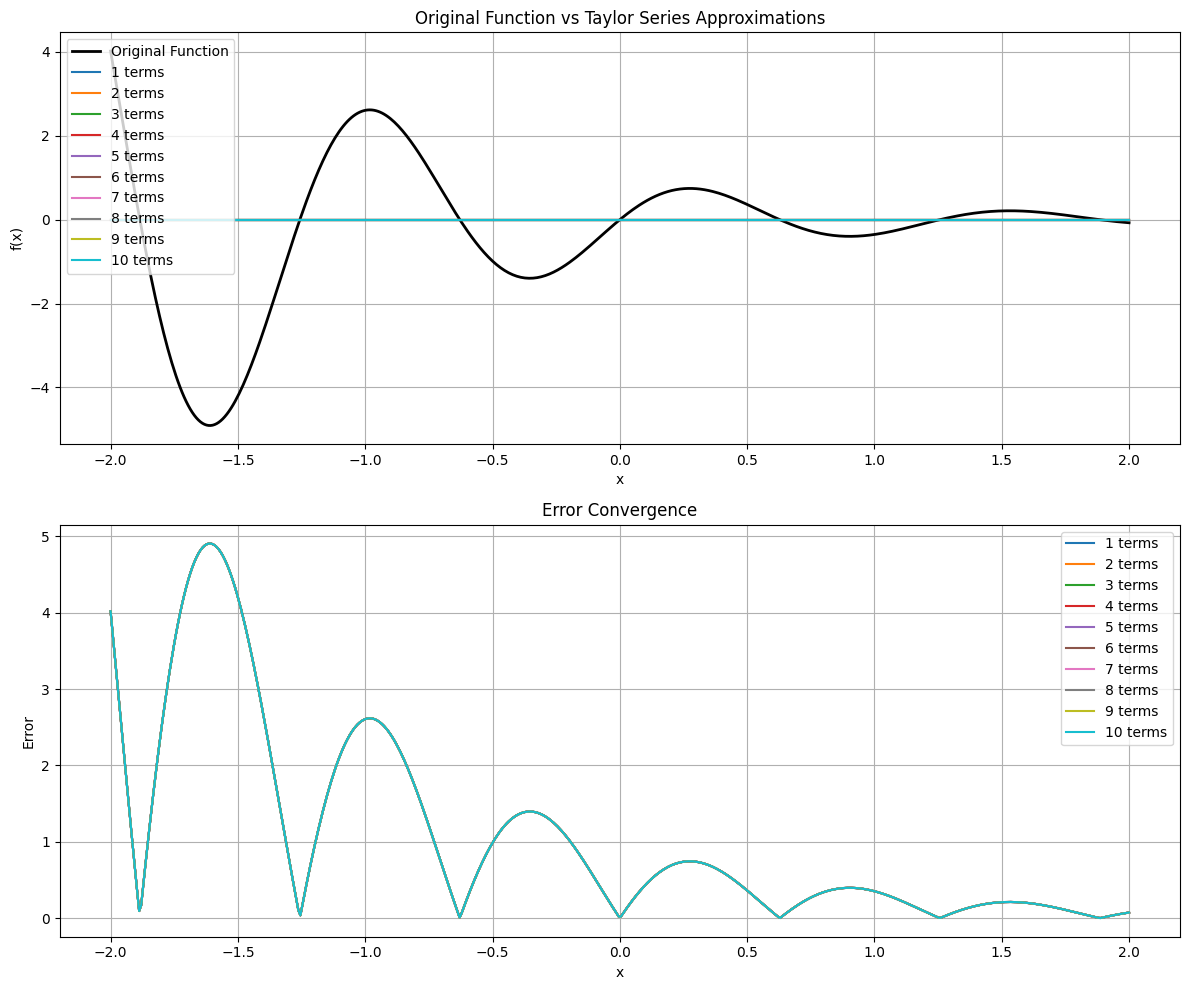

In [139]:
# Example usage:
if __name__ == "__main__":
    # Symbolic setup for the function
    x_sym = sp.symbols('x')
    f, derivatives = create_test_function(x_sym)

    # Instantiate TaylorExpansion
    taylor_expansion = TaylorExpansion(f, derivatives)

    # Define x values for visualization
    x_values = np.linspace(-2, 2, 500)

    # Analyze Taylor series convergence
    analyze_taylor_convergence(x_values, taylor_expansion, x0=0)

## Section 2: Optimized Newton's Polynomial Interpolation (40 Points)
### Background
Newton’s polynomial interpolation constructs a polynomial that passes through a given set of points. This method uses divided differences, which allows the interpolation polynomial to be calculated efficiently, especially when adding new points.

The divided differences formula is:
$f[x_0,x_1,\ldots,x_k] = \frac{f[x_1,\ldots,x_k] - f[x_0,\ldots,x_{k-1}]}{x_k-x_0}$

### Task 2.1: Vectorized Implementation (20 points)
**Step 1:** Begin by constructing the divided difference table, where each entry represents the divided difference for a subset of data points. Avoid using nested loops, which are inefficient, and instead leverage numpy for vectorized calculations.

**Step 2:** Write a recursive function (or use Horner’s method) to evaluate the Newton polynomial at any given point. Remember that each new term involves a product of previous terms multiplied by the current divided difference.

**Example:** If implementing Horner’s method, express the polynomial in a nested form:

$$
P(x) = a_0 + (x - x_0) \left( a_1 + (x - x_1) \left( a_2 + \dots \right) \right)
$$

This recursive evaluation minimizes computation by reducing operations.

In [ ]:
class NewtonInterpolation:
    """
    Efficient implementation of Newton's polynomial interpolation.
    """
    def __init__(self, x: np.ndarray, y: np.ndarray):
        """
        Initialize with data points.

        Args:
            x: x coordinates
            y: y coordinates
        """
        self.x = x
        self.y = y
        self.coefficients = None

    def compute_divided_differences(self) -> np.ndarray:
        """
        Compute divided differences table using vectorized operations.

        Returns:
            Array of divided difference coefficients
        """
        # TODO: Implement
        # Avoid explicit loops where possible
        # Use numpy's advanced indexing capabilities
        n = len(self.y)
        divided_diff = np.zeros((n, n))
        divided_diff[:, 0] = self.y
        for j in range(1, n):
            divided_diff[j:n, j] = (divided_diff[j:n, j - 1] - divided_diff[j - 1:n - 1, j - 1]) / (self.x[j:n] - self.x[:n - j])

        self.coefficients = divided_diff[0, :]

        return self.coefficients


    def evaluate(self, x_eval: np.ndarray) -> np.ndarray:
        """
        Evaluate Newton polynomial using Horner's method.

        Args:
            x_eval: Points at which to evaluate polynomial

        Returns:
            Interpolated values
        """
        # TODO: Implement efficient polynomial evaluation
        # Use Horner's method for numerical stability
        if self.coefficients is None:
            raise ValueError("Divided differences not computed. Call compute_divided_differences() first.")

        n = len(self.coefficients)
        result = np.zeros_like(x_eval, dtype=float)

        for i in range(n - 1, -1, -1):
            result = result * (x_eval - self.x[i]) + self.coefficients[i]

        return result


### Task 2.2: Performance Analysis (20 points)
**Step 1:** Generate a dataset with points sampled from a complex function, such as $f(x) = \cos(x) + 0.5 \sin(3x)$ with 50–100 points.

**Step 2:** Measure runtime for your optimized, vectorized interpolation versus a standard loop-based approach using Python’s time module or %timeit in Jupyter.

**Step 3:** Plot runtime vs. number of points to observe performance differences.

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from typing import List

# Define mentioned function
def complex_function(x):
        return np.cos(x) + 0.5 * np.sin(3 * x)

def compare_interpolation_performance(n_points: List[int]) -> None:
    """
    Compare performance of vectorized vs loop-based implementation.

    Args:
        n_points: List of different dataset sizes to test
    """
    # Store runtime and error data
    vectorized_runtimes = []
    loop_based_runtimes = []


    for n in n_points:
        # Generate dataset
        x = np.linspace(0, 2 * np.pi, n)
        y = complex_function(x)

        # Test vectorized implementation
        vectorized_interp = NewtonInterpolation(x, y)
        start_time = time.time()
        vectorized_interp.compute_divided_differences()
        vectorized_runtimes.append(time.time() - start_time)


        # Test loop-based implementation
        start_time = time.time()
        divided_diff = np.zeros((n, n))
        divided_diff[:, 0] = y
        for j in range(1, n):
            for i in range(j, n):
                divided_diff[i, j] = (divided_diff[i, j - 1] - divided_diff[i - 1, j - 1]) / (x[i] - x[i - j])
        loop_based_runtimes.append(time.time() - start_time)

    # Plot runtime comparisons
    plt.figure(figsize=(12, 6))
    plt.plot(n_points, vectorized_runtimes, label='Vectorized Implementation', marker='o')
    plt.plot(n_points, loop_based_runtimes, label='Loop-Based Implementation', marker='o')
    plt.xlabel('Number of Points')
    plt.ylabel('Runtime (seconds)')
    plt.title('Runtime Comparison: Vectorized vs Loop-Based Interpolation')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Optional: Error comparison could be added based on a test dataset


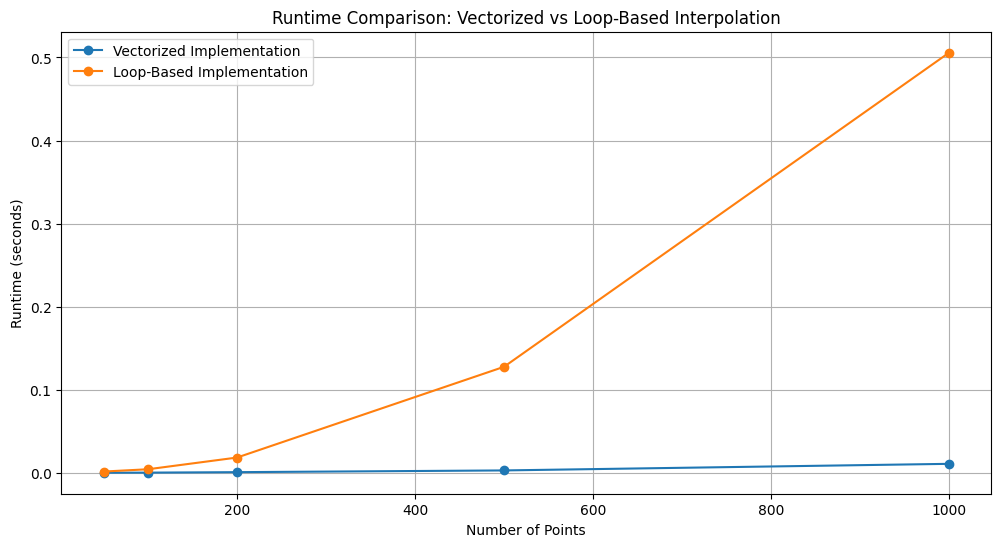

In [ ]:
compare_interpolation_performance([50, 100, 200, 500, 1000])


## Section 3: Extended Cubic Spline Interpolation (30 Points)
### Background
Cubic splines are piecewise polynomials used for interpolation. Natural cubic splines have zero second derivatives at their endpoints, while clamped splines enforce specified first derivatives. These boundary conditions affect the smoothness and accuracy of the interpolated curve, particularly near endpoints.

### Task 3.1: Custom Boundary Conditions (20 points)
**Step 1:** For a natural spline, set up a tridiagonal system of equations where the second derivatives at the endpoints are zero. This will yield a smooth transition across segments.

**Step 2:** For a clamped spline, allow user-specified first derivatives at both ends. Modify the system of equations to incorporate these boundary constraints. For instance, the first and last rows of the system should reflect the first derivatives.

**Hint:** Review the mathematics of cubic splines if you are unfamiliar with constructing the tridiagonal system. Each segment should ensure continuity in the function, its first derivative, and second derivative.

In [ ]:
class CubicSpline:
    """
    Cubic spline interpolation with flexible boundary conditions.
    """
    def __init__(self, x: np.ndarray, y: np.ndarray):
        self.x = x
        self.y = y
        self.coefficients = None

    def compute_coefficients(self,
                           boundary_type: str = 'natural',
                           derivatives: Tuple[float, float] = None) -> None:
        """
        Compute spline coefficients.

        Args:
            boundary_type: 'natural' or 'clamped'
            derivatives: (left_derivative, right_derivative) for clamped case
        """
        # TODO: Implement coefficient calculation
        # 1. Set up tridiagonal system
        # 2. Handle boundary conditions
        # 3. Solve for coefficients

        n = len(self.x) - 1
        h = np.diff(self.x)
        b = (np.diff(self.y) / h)

        # Set up the tridiagonal matrix:
        A = np.zeros((n + 1, n + 1))
        Right_Side = np.zeros(n + 1)

        for i in range(1, n):
            A[i, i - 1] = h[i - 1]
            A[i, i] = 2 * (h[i - 1] + h[i])
            A[i, i + 1] = h[i]
            Right_Side[i] = 3 * (b[i] - b[i - 1])
        if boundary_type == 'natural':
            A[0, 0] = 1
            A[n, n] = 1

        elif boundary_type == 'clamped':
            A[0, 0] = 2 * h[0]
            A[0, 1] = h[0]
            Right_Side[0] = 3 * (b[0] - derivatives[0])

            A[n, n - 1] = h[-1]
            A[n, n] = 2 * h[-1]
            Right_Side[n] = 3 * (derivatives[1] - b[-1])


        m = np.linalg.solve(A, Right_Side)
        self.coefficients = []
        for i in range(n):
            c0 = self.y[i]
            c1 = b[i] - h[i] * (2 * m[i] + m[i + 1]) / 3
            c2 = m[i]
            c3 = (m[i + 1] - m[i]) / (3 * h[i])
            self.coefficients.append((c0, c1, c2, c3))


    def evaluate(self, x_eval: np.ndarray) -> np.ndarray:
        """
        Evaluate spline at given points.

        Args:
            x_eval: Points at which to evaluate spline

        Returns:
            Interpolated values
        """
        # TODO: Implement spline evaluation
        y_eval = np.zeros_like(x_eval)
        for i, x in enumerate(x_eval):
            for j in range(len(self.x) - 1):
                if self.x[j] <= x <= self.x[j + 1]:
                    c0, c1, c2, c3 = self.coefficients[j]
                    dx = x - self.x[j]
                    y_eval[i] = c0 + c1 * dx + c2 * dx**2 + c3 * dx**3
                    break
        return y_eval

I added this part to visualize an instatiate from CubicSpline class.

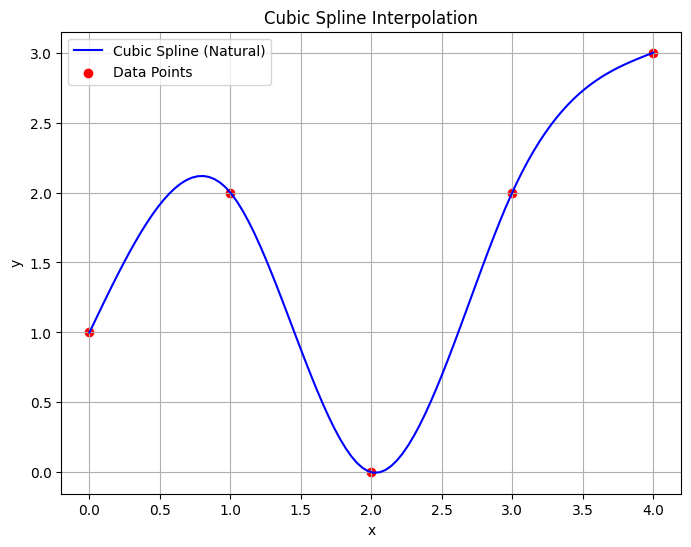

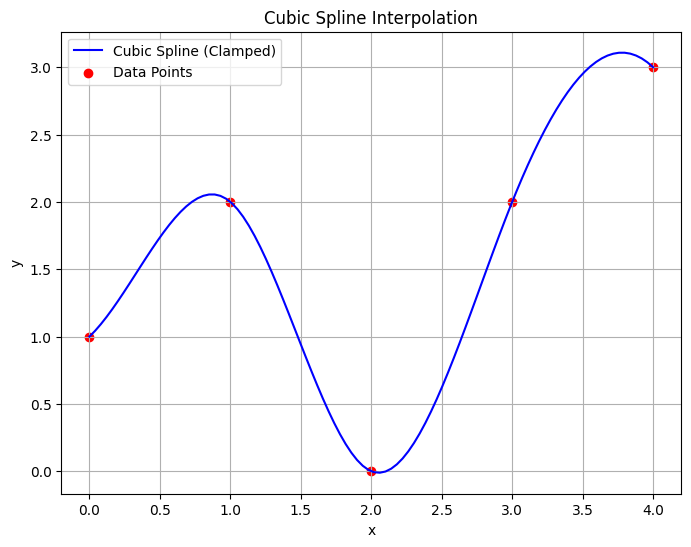

In [69]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 2, 0, 2, 3])

# Natural spline
spline_natural = CubicSpline(x, y)
spline_natural.compute_coefficients(boundary_type='natural')
x_eval = np.linspace(0, 4, 100)


y_eval_natural = spline_natural.evaluate(x_eval)

plt.figure(figsize=(8, 6))
plt.plot(x_eval, y_eval_natural, label="Cubic Spline (Natural)", color='blue')
plt.scatter(x, y, color='red', label="Data Points")
plt.title("Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Clamped spline
spline_clamped = CubicSpline(x, y)
spline_clamped.compute_coefficients(boundary_type='clamped', derivatives=(1, -1))
y_clamped_eval = spline_clamped.evaluate(x_eval)

plt.figure(figsize=(8, 6))
plt.plot(x_eval, y_clamped_eval, label="Cubic Spline (Clamped)", color='blue')
plt.scatter(x, y, color='red', label="Data Points")
plt.title("Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


### Task 3.2: Boundary Condition Analysis (10 points)
**Step 1:** Generate sample data that captures variations in behavior at endpoints (e.g., rapidly increasing/decreasing values).

**Step 2:** Fit both natural and clamped splines, then plot the results on the same graph. Use markers at endpoints and a zoomed-in view to clearly observe boundary behavior.



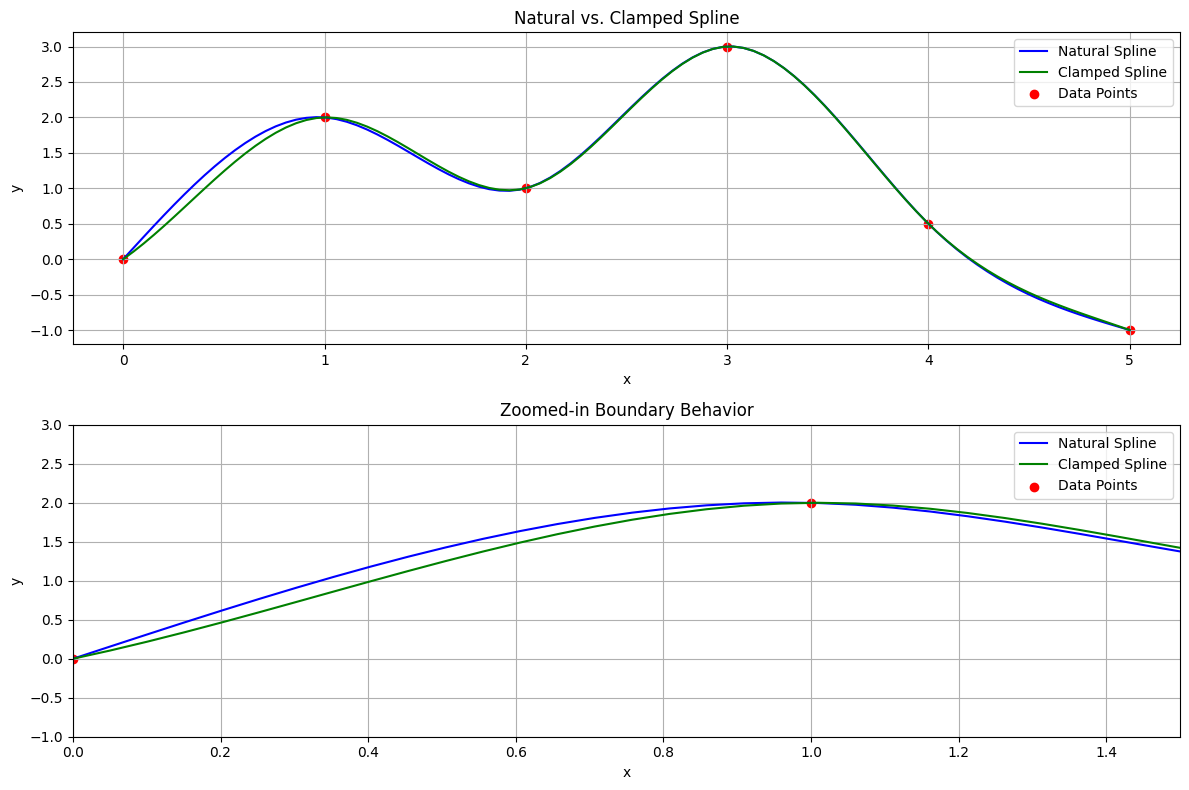

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

def compare_boundary_conditions() -> None:
    """
    Compare natural and clamped cubic splines.
    """
    # Generate test data(you can change the data if you want.)
    x = np.array([0, 1, 2, 3, 4, 5])
    y = np.array([0, 2, 1, 3, 0.5, -1])
    derivatives = (2, -1)  # derivatives for clamped boundary conditions

    # Step 2: Fit both types of splines
    # Natural spline
    natural_spline = CubicSpline(x, y)
    natural_spline.compute_coefficients(boundary_type="natural")

    # Clamped spline
    clamped_spline = CubicSpline(x, y)
    clamped_spline.compute_coefficients(boundary_type="clamped", derivatives=derivatives)

    # Evaluate splines
    # You can increase number_of_points to get a more smooth graph if you want. :)
    number_of_points = 100
    x_eval = np.linspace(0, 5, number_of_points)
    y_natural = natural_spline.evaluate(x_eval)
    y_clamped = clamped_spline.evaluate(x_eval)

    # Visualize differences
    plt.figure(figsize=(12, 8))

    # Plot both spline types
    plt.subplot(2, 1, 1)
    plt.plot(x_eval, y_natural, label="Natural Spline", color='blue')
    plt.plot(x_eval, y_clamped, label="Clamped Spline", color='green')
    plt.scatter(x, y, color='red', label="Data Points")
    plt.title("Natural vs. Clamped Spline")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

    # Zoom in on boundary behavior
    plt.subplot(2, 1, 2)
    plt.plot(x_eval, y_natural, label="Natural Spline", color='blue')
    plt.plot(x_eval, y_clamped, label="Clamped Spline", color='green')
    plt.scatter(x, y, color='red', label="Data Points")
    plt.xlim(0, 1.5)  # Zoom in on the left boundary
    plt.ylim(-1, 3)   # Adjust limits for better visualization
    plt.title("Zoomed-in Boundary Behavior")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function
compare_boundary_conditions()


## Final Conceptual Questions (10 Points)
Briefly explain:
1. Based on your implementations and analysis:
   - Compare the computational efficiency of Taylor series vs interpolation methods

   series approximation relies on evaluating derivatives of a function at a single point. While this makes Taylor series efficient for functions with easily computable derivatives, its accuracy decreases as the evaluation point moves away from the expansion point. Interpolation methods, such as cubic splines, distribute computation across multiple points, offering higher accuracy for approximations across a broader domain. However, interpolation methods, especially cubic splines, involve solving systems of linear equations (e.g., a tridiagonal system), which can make them computationally heavier than Taylor series for small datasets. That said, for larger datasets, splines are more stable and avoid the high-degree polynomials that can lead to Runge's phenomenon, making them more efficient for practical purposes

2. Consider practical applications:
   - When would you choose splines over polynomial interpolation?
   
   polynomial interpolation in cases where:

    The dataset is large, and the function needs to be approximated piecewise for better stability and accuracy.
    The risk of Runge's phenomenon (oscillations near the edges of the interval) must be avoided, as it occurs with high-degree polynomials.
    Smoothness is critical, such as ensuring continuity of the first and second derivatives (e.g., in computer graphics, motion planning, or finite element analysis).
    Non-uniform spacing of data points needs to be handled efficiently. In contrast, polynomial interpolation might be chosen for small datasets or where a single global polynomial is sufficient.